# Problem statement
The goal of this project is to predict the type of bean using various features of the bean. This is a multi-class classification problem. F1-score is taken as an evaluation metric.

# Dataset
The dataset for this assignment is the Dry Bean Dataset. It contains various features of different types of beans, as well as their corresponding type.

# Data description
The dataset contains the following features:

- **Area (A)**: The area of a bean zone and the number of pixels within its boundaries.
- **Perimeter (P)**: Bean circumference is defined as the length of its border.
- **Major axis length (L)**: The distance between the ends of the longest line that can be drawn from a bean.
- **Minor axis length (l)**: The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- **Aspect ratio (K)**: Defines the relationship between L and l.
- **Eccentricity (Ec)**: Eccentricity of the ellipse having the same moments as the region.
- **Convex area (C):** Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- **Equivalent diameter (Ed)**: The diameter of a circle having the same area as a bean seed area.
- **Extent (Ex)**: The ratio of the pixels in the bounding box to the bean area.
- **Solidity (S)**: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- **Roundness (R)**: Calculated with the following formula: (4piA)/(P^2)
- **Compactness (CO)**: Measures the roundness of an object: Ed/L
- **ShapeFactor1 (SF1)**
- **ShapeFactor2 (SF2)**
- **ShapeFactor3 (SF3)**
- **ShapeFactor4 (SF4)**
- **Class** (the type of bean: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira)

## 1. Load the dataset

In [178]:
# Import the necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [179]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv('beans-230728-202723.csv')

In [180]:
# Display the first few rows of the DataFrame
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,NaN,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [181]:
# Display the last few rows of the DataFrame
data.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,NaN,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,NaN,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600.0,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [5]:
# Display the info of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  12577 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       12808 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      12223 non-null  float64
 12  ShapeFactor1     13080 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     12563 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
# check the uique values
data.nunique()

Area               12011
Perimeter          13413
MajorAxisLength    13543
MinorAxisLength    12521
AspectRation       13543
Eccentricity       13543
ConvexArea         11430
EquivDiameter      12011
Extent             13535
Solidity           13526
roundness          13543
Compactness        12165
ShapeFactor1       13018
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       12507
Class                  7
dtype: int64

In [7]:
# Target variable value counts
data.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [8]:
# Display column names
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [9]:
# check missing values
data.isnull().sum()

Area                  0
Perimeter             0
MajorAxisLength       0
MinorAxisLength    1034
AspectRation          0
Eccentricity          0
ConvexArea          803
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness        1388
ShapeFactor1        531
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4       1048
Class                 0
dtype: int64

In [10]:
# Display Data Types of the variables
data.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea         float64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

## 2. Perform exploratory data analysis (EDA) to gain insights about the data

### i. Visualize the distribution or value counts of all the variables.

In [19]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

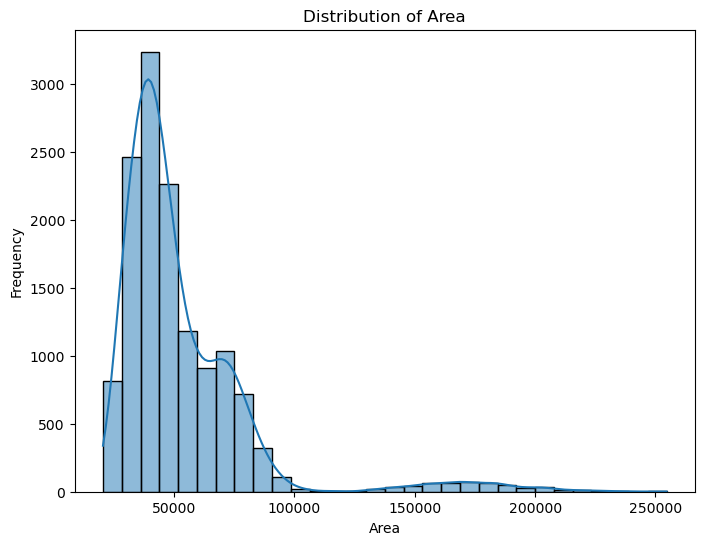

In [92]:
# Visualize the distribution of the "Area" feature
plt.figure(figsize=(8,6))
sns.histplot(data['Area'],bins=30,kde=True)
plt.title('Distribution of Area')
plt.ylabel('Frequency')
plt.show()

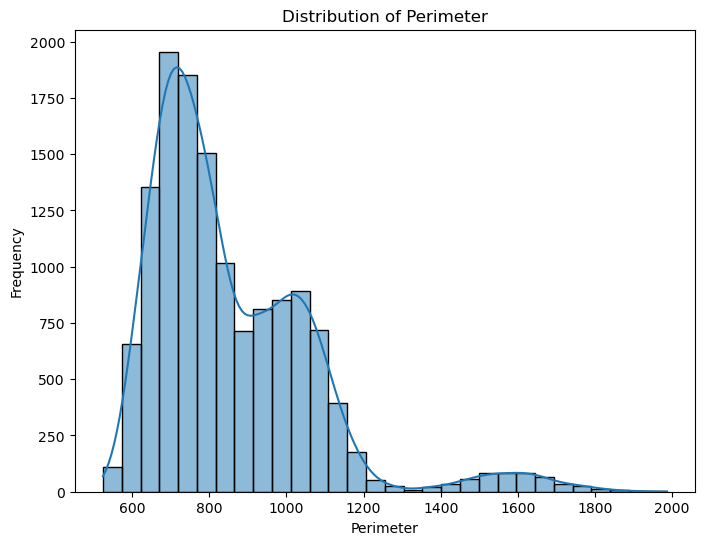

In [93]:
# Visualize the distribution of the "Perimeter" feature
plt.figure(figsize=(8,6))
sns.histplot(data['Perimeter'],bins=30,kde=True)
plt.title('Distribution of Perimeter')
plt.ylabel('Frequency')
plt.show()

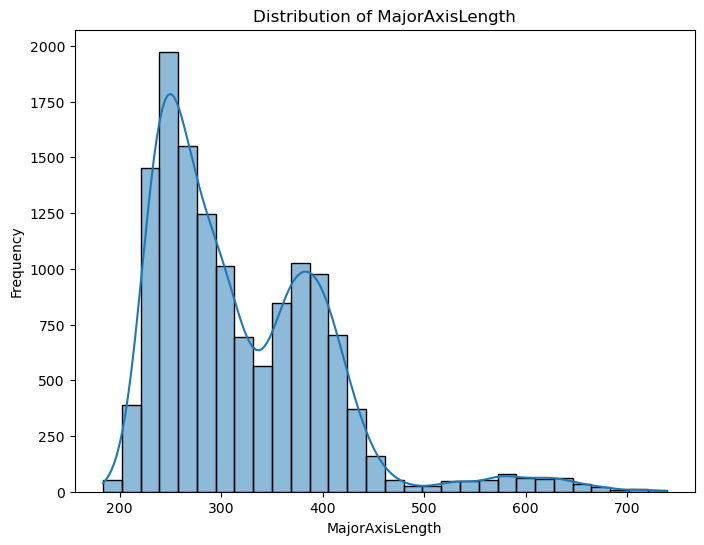

In [94]:
# Visualize the distribution of the "MajorAxisLength" feature
plt.figure(figsize=(8,6))
sns.histplot(data['MajorAxisLength'],bins=30,kde=True)
plt.title('Distribution of MajorAxisLength')
plt.ylabel('Frequency')
plt.show()

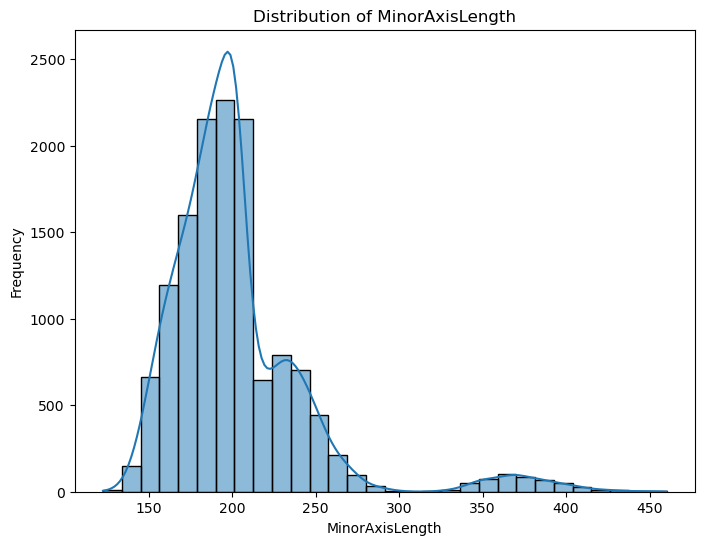

In [95]:
# Visualize the distribution of the "MinorAxisLength" feature
plt.figure(figsize=(8,6))
sns.histplot(data['MinorAxisLength'],bins=30,kde=True)
plt.title('Distribution of MinorAxisLength')
plt.ylabel('Frequency')
plt.show()

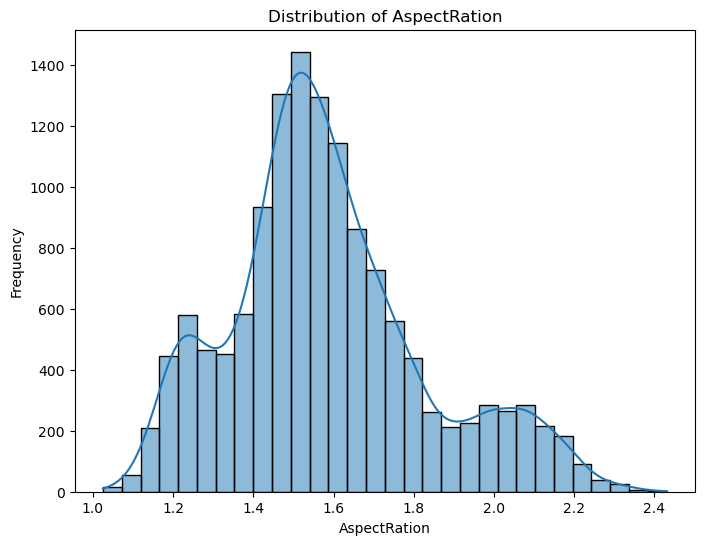

In [105]:
# Visualize the distribution of the "AspectRation" feature
plt.figure(figsize=(8,6))
sns.histplot(data['AspectRation'],bins=30,kde=True)
plt.title('Distribution of AspectRation')
plt.ylabel('Frequency')
plt.show()

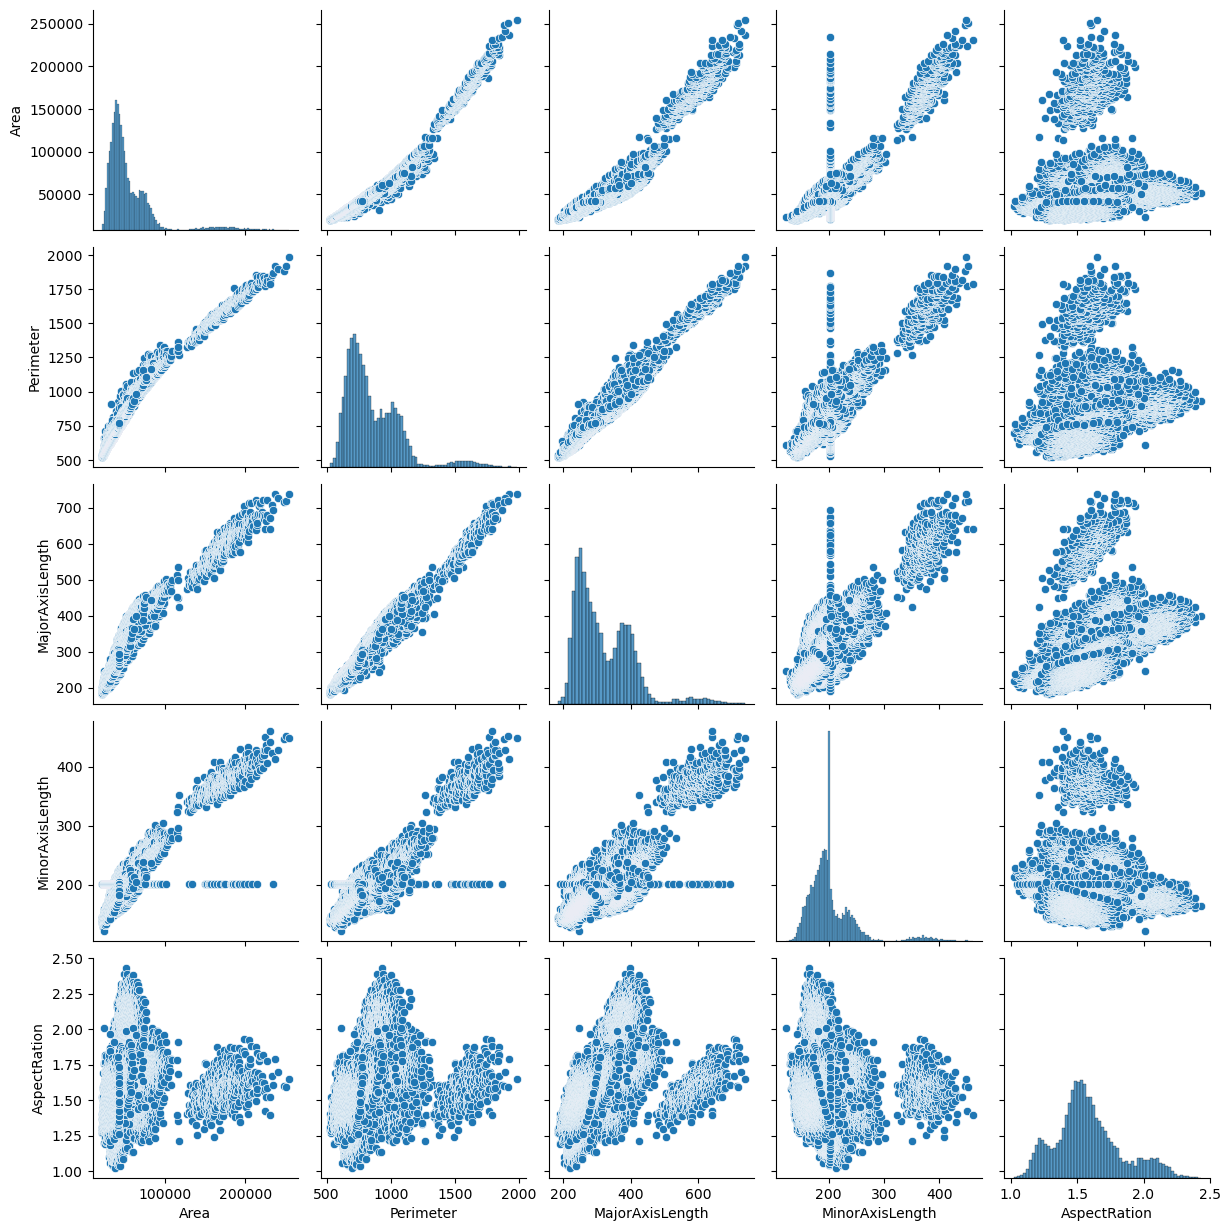

In [104]:
# Pairplot for variables 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength','AspectRation'
sns.pairplot(data[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation']])
plt.show()

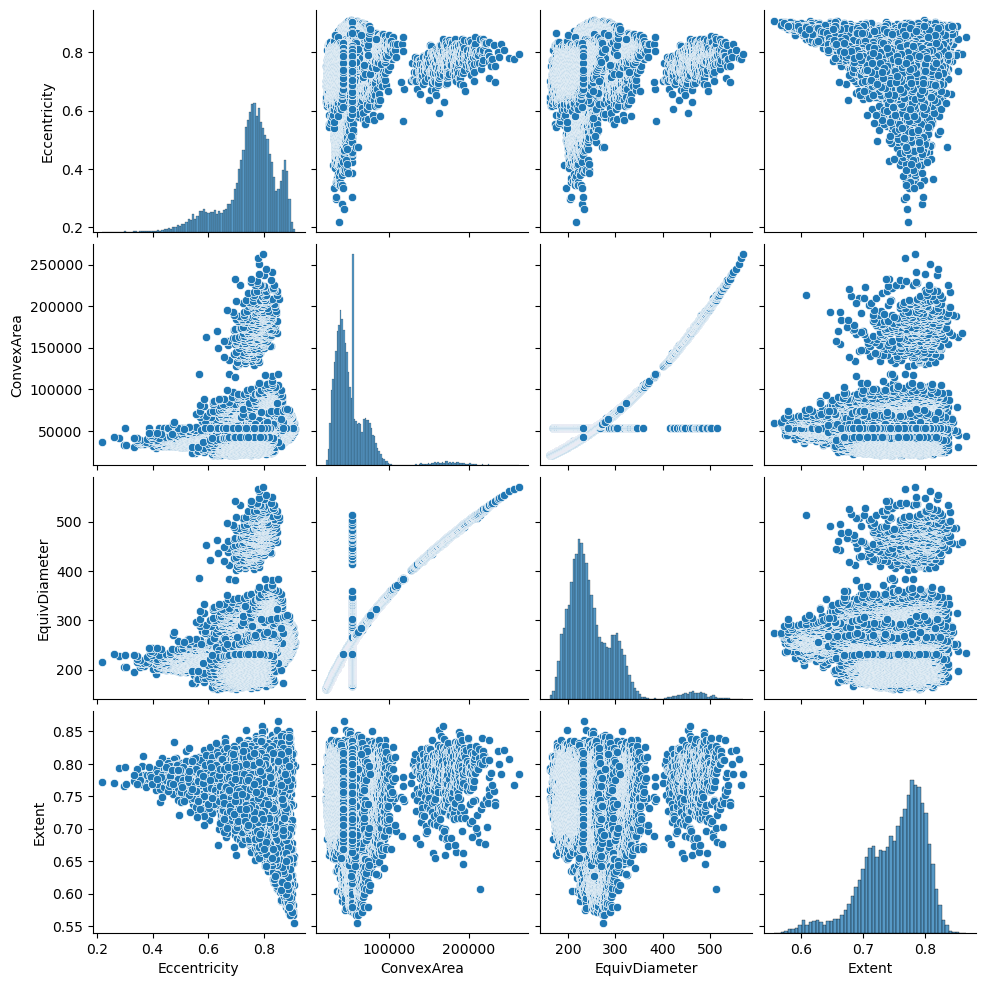

In [113]:
# Pairplot for Varibales 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent'
sns.pairplot(data[['Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent']])
plt.show()

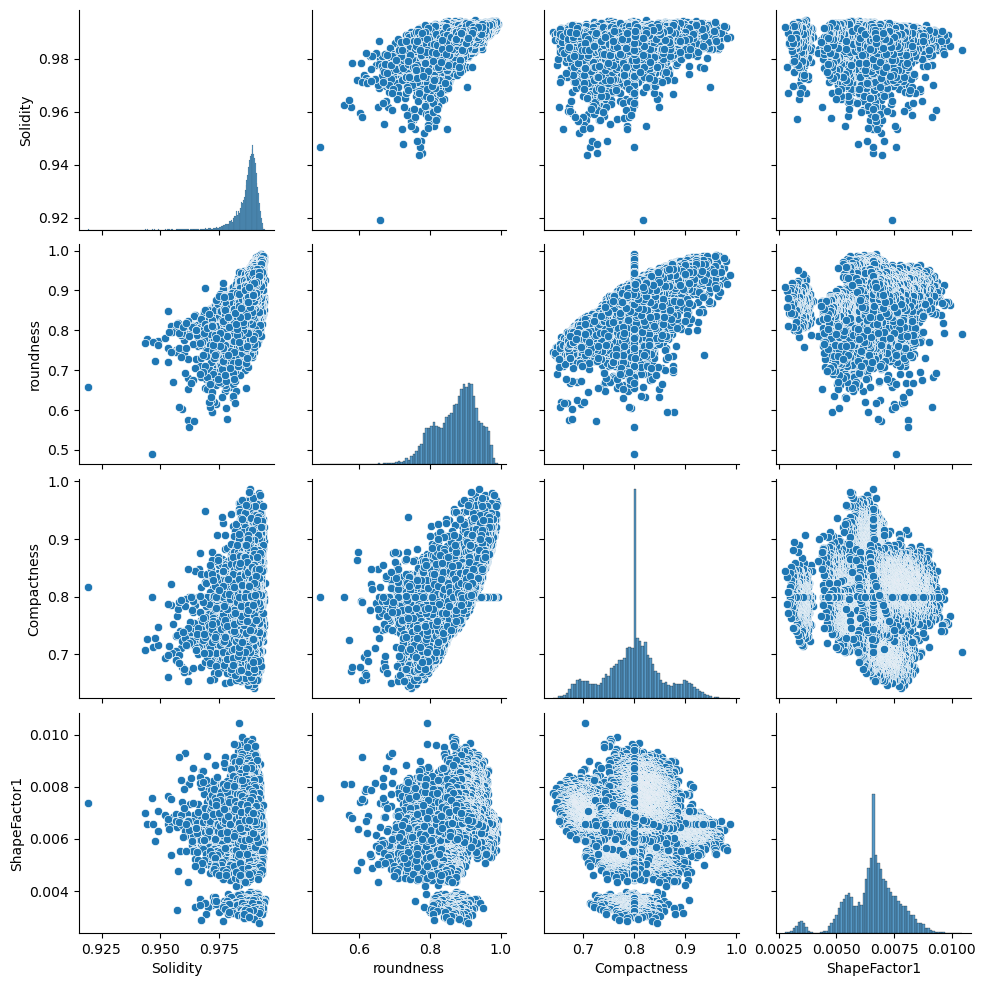

In [114]:
# Pairplot for Variables 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1'
sns.pairplot(data[['Solidity', 'roundness', 'Compactness', 'ShapeFactor1']])
plt.show()

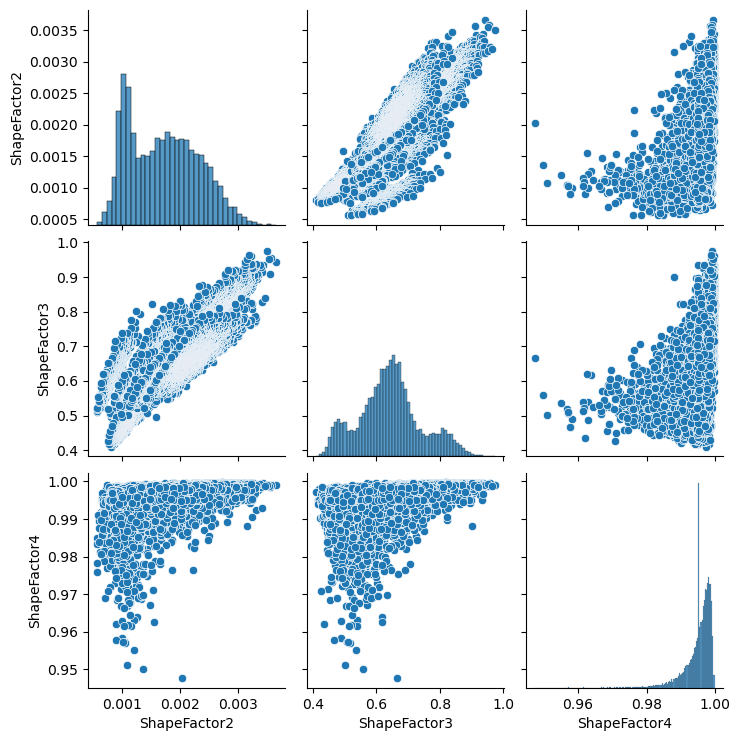

In [115]:
# PairPlot for varibales 'ShapeFactor2','ShapeFactor3', 'ShapeFactor4', 'Class'
sns.pairplot(data[['ShapeFactor2','ShapeFactor3', 'ShapeFactor4', 'Class']])
plt.show()

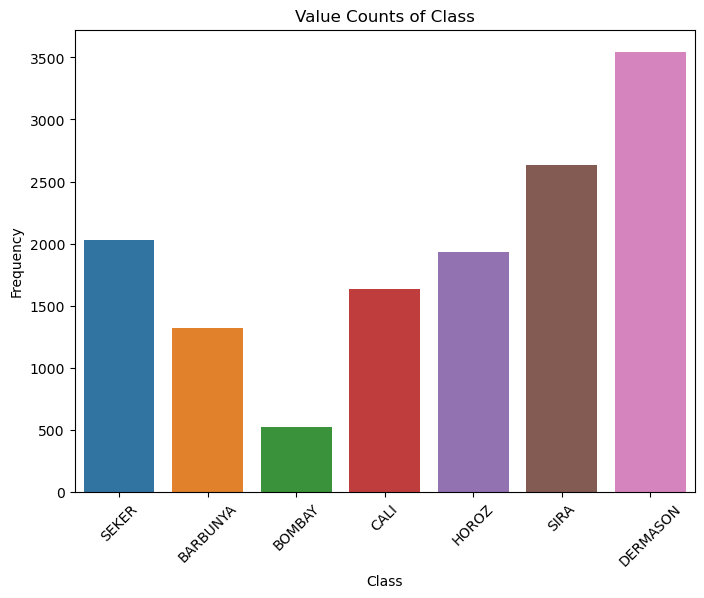

In [78]:
# Visualize the value counts of the target variable "Class"
plt.figure(figsize=(8,6))
sns.countplot(data=data,x=data['Class'])
plt.title('Value Counts of Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### ii. Calculate the correlation between the features and between the features and target variable.

In [11]:
# Calculate the correlation matrix for numerical features
correlation_matrix = data.corr()
print(correlation_matrix)

                     Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951919   
Perimeter        0.966722   1.000000         0.977338         0.913813   
MajorAxisLength  0.931834   0.977338         1.000000         0.827596   
MinorAxisLength  0.951919   0.913813         0.827596         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.006718   
Eccentricity     0.267481   0.391066         0.541972         0.021061   
ConvexArea       0.999940   0.967765         0.932886         0.951980   
EquivDiameter    0.984968   0.991380         0.961733         0.949007   
Extent           0.054345  -0.021160        -0.078062         0.145798   
Solidity        -0.196585  -0.303970        -0.284302        -0.157905   
roundness       -0.357530  -0.547647        -0.596358        -0.212387   
Compactness     -0.269963  -0.409209        -0.571230        -0.016189   
ShapeFactor1    -0.847960  -0.864684  

In [12]:
# Calculate the correlation matrix for numerical features
data.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951919,0.241735,0.267481,0.999940,0.984968,0.054345,-0.196585,-0.357530,-0.269963,-0.847960,-0.639291,-0.272145,-0.358437
Perimeter,0.966722,1.000000,0.977338,0.913813,0.385276,0.391066,0.967765,0.991380,-0.021160,-0.303970,-0.547647,-0.409209,-0.864684,-0.767592,-0.408435,-0.432084
MajorAxisLength,0.931834,0.977338,1.000000,0.827596,0.550335,0.541972,0.932886,0.961733,-0.078062,-0.284302,-0.596358,-0.571230,-0.773840,-0.859238,-0.568185,-0.484663
MinorAxisLength,0.951919,0.913813,0.827596,1.000000,-0.006718,0.021061,0.951980,0.949007,0.145798,-0.157905,-0.212387,-0.016189,-0.947309,-0.473942,-0.021480,-0.271079
AspectRation,0.241735,0.385276,0.550335,-0.006718,1.000000,0.924293,0.243606,0.303647,-0.370184,-0.267754,-0.766979,-0.987748,0.024611,-0.837841,-0.978592,-0.450050
Eccentricity,0.267481,0.391066,0.541972,0.021061,0.924293,1.000000,0.269289,0.318667,-0.319362,-0.297592,-0.722272,-0.970292,0.019676,-0.860141,-0.981058,-0.450181
ConvexArea,0.999940,0.967765,0.932886,0.951980,0.243606,0.269289,1.000000,0.985194,0.054681,-0.204743,-0.362640,-0.271566,-0.847761,-0.640698,-0.274109,-0.363698
EquivDiameter,0.984968,0.991380,0.961733,0.949007,0.303647,0.318667,0.985194,1.000000,0.028383,-0.231648,-0.435945,-0.329631,-0.892874,-0.713069,-0.330389,-0.395291
Extent,0.054345,-0.021160,-0.078062,0.145798,-0.370184,-0.319362,0.054681,0.028383,1.000000,0.191389,0.344411,0.358459,-0.143604,0.237956,0.347624,0.150898
Solidity,-0.196585,-0.303970,-0.284302,-0.157905,-0.267754,-0.297592,-0.204743,-0.231648,0.191389,1.000000,0.607150,0.305541,0.150609,0.343559,0.307662,0.697677


C:\Users\DELL\AppData\Local\Temp\ipykernel_2528\2357464179.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

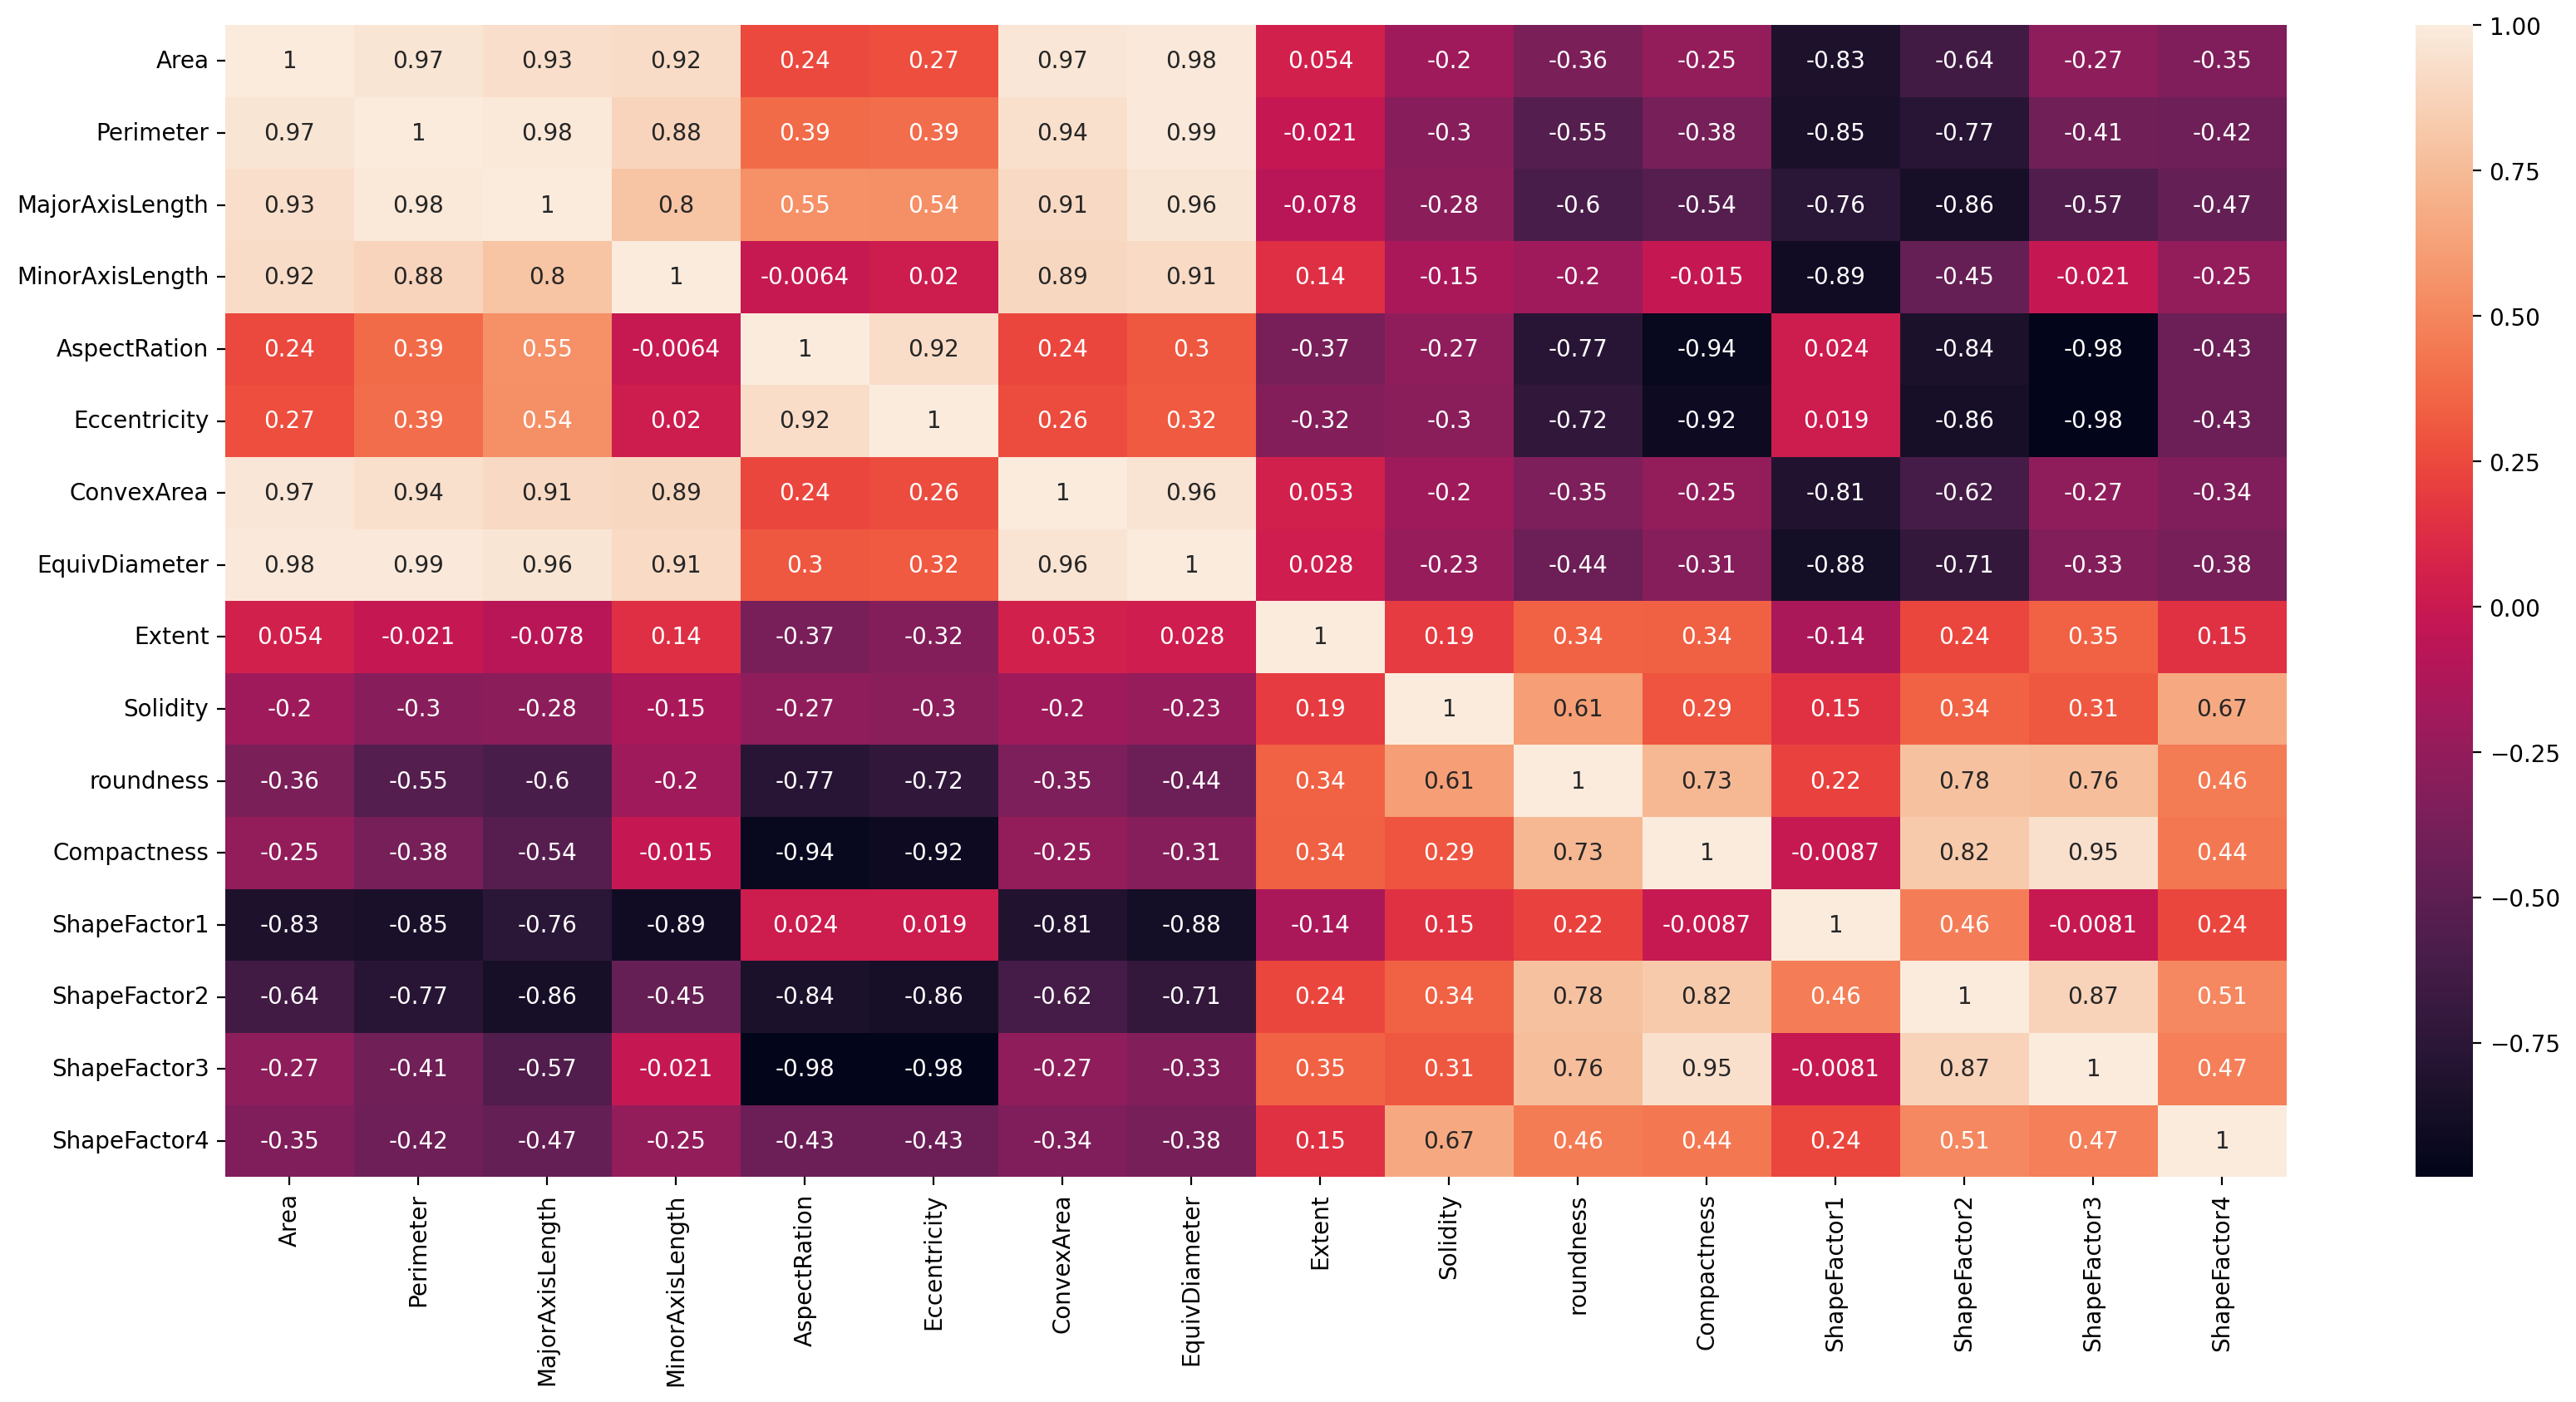

In [96]:
# Correlation heatmap for numerical variables
plt.figure(figsize = (20,9), dpi = 200)
sns.heatmap(data.corr(), annot = True)

### iii. Summarize descriptive statistics of the variables.

In [13]:
# Summarize descriptive statistics of numerical variables
summary_statistics = data.describe()

# Print the summary statistics
print('summary_statistics:')
summary_statistics

summary_statistics:


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,12577.000000,13611.000000,13611.000000,12808.000000,13611.000000,13611.000000,13611.000000,13611.000000,12223.000000,13080.000000,13611.000000,13611.000000,12563.000000
mean,53048.284549,855.283459,320.141867,202.295543,1.583242,0.750895,53726.689413,253.064220,0.749733,0.987143,0.873282,0.799551,0.006564,0.001716,0.643590,0.995069
std,29324.095717,214.289696,85.694186,45.044880,0.246678,0.092002,29842.557030,59.177120,0.049086,0.004660,0.059520,0.061646,0.001130,0.000596,0.098996,0.004339
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.755083,1.432307,0.715928,36684.750000,215.068003,0.718634,0.985670,0.832096,0.762149,0.005897,0.001154,0.581359,0.993701
50%,44652.000000,794.941000,296.883367,192.426897,1.551124,0.764441,45106.000000,238.438026,0.759859,0.988283,0.883157,0.801003,0.006645,0.001694,0.642044,0.996380
75%,61332.000000,977.213000,376.495012,217.081036,1.707109,0.810466,62307.000000,279.446467,0.786851,0.990013,0.916869,0.833962,0.007272,0.002170,0.696006,0.997886
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## 3. Preprocess the data as necessary to prepare it for modeling. 

### i. Handling Missing Values

In [14]:
# Check the missing values
data.isnull().sum()

Area                  0
Perimeter             0
MajorAxisLength       0
MinorAxisLength    1034
AspectRation          0
Eccentricity          0
ConvexArea          803
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness        1388
ShapeFactor1        531
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4       1048
Class                 0
dtype: int64

In [15]:
# Impute missing values with the mean of the respective column
data.fillna(data.mean(),inplace=True)

In [16]:
# Check the missing values
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

### ii. Dealing with Outliers

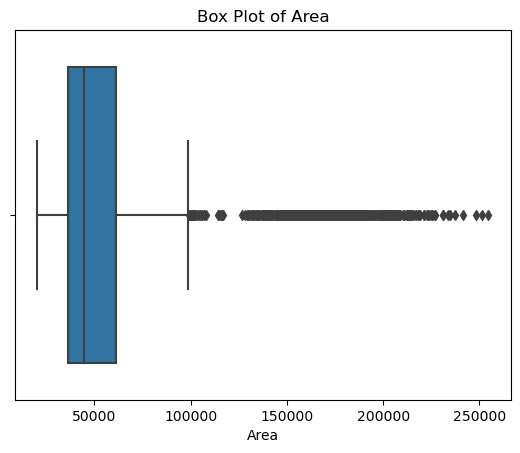

In [182]:
# Dealing with Outliers
sns.boxplot(data=data, x='Area')
plt.title('Box Plot of Area')
plt.xlabel('Area')
plt.show()

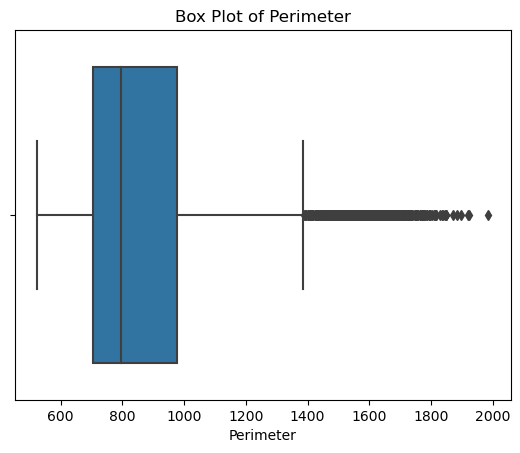

In [183]:
# Dealing with Outliers
sns.boxplot(data=data, x='Perimeter')
plt.title('Box Plot of Perimeter')
plt.xlabel('Perimeter')
plt.show()

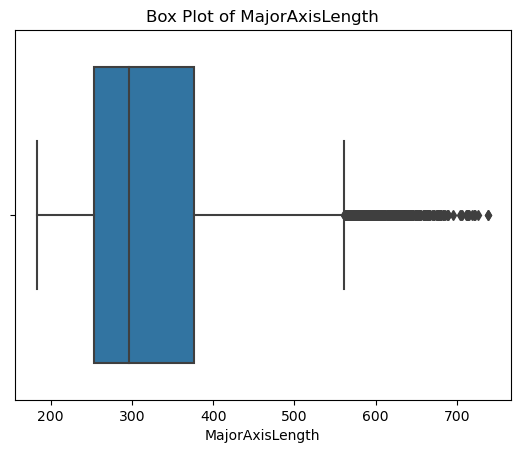

In [184]:
# Dealing with Outliers
sns.boxplot(data=data, x='MajorAxisLength')
plt.title('Box Plot of MajorAxisLength')
plt.xlabel('MajorAxisLength')
plt.show()

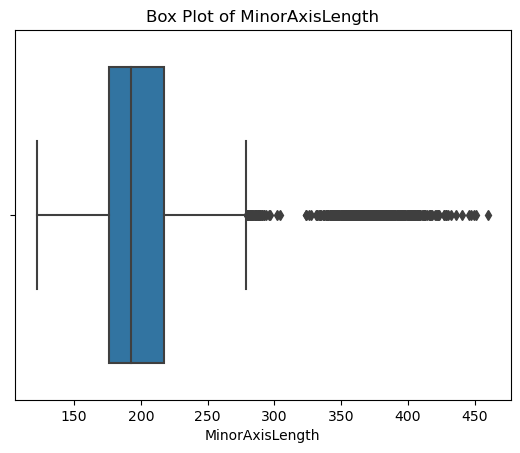

In [186]:
# Dealing with Outliers
sns.boxplot(data=data, x='MinorAxisLength')
plt.title('Box Plot of MinorAxisLength')
plt.xlabel('MinorAxisLength')
plt.show()

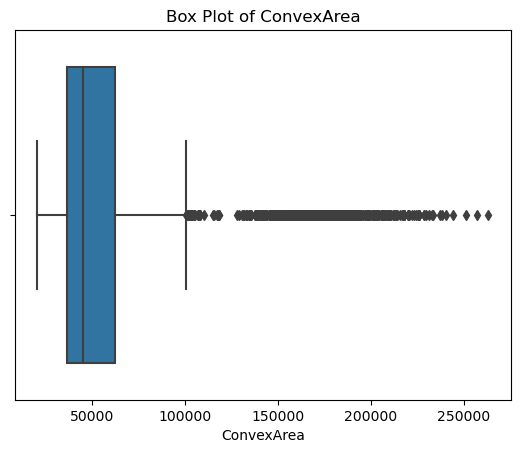

In [187]:
# Dealing with Outliers
sns.boxplot(data=data, x='ConvexArea')
plt.title('Box Plot of ConvexArea')
plt.xlabel('ConvexArea')
plt.show()

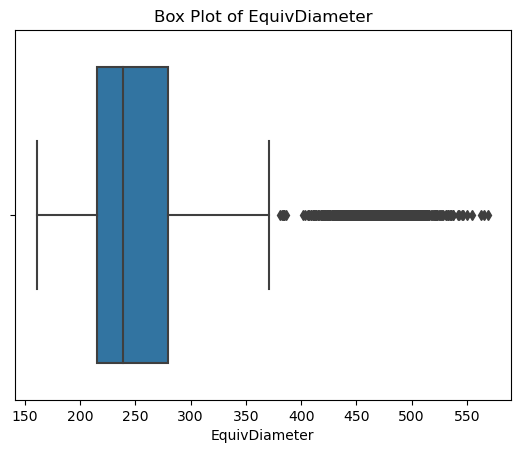

In [188]:
# Dealing with Outliers
sns.boxplot(data=data, x='EquivDiameter')
plt.title('Box Plot of EquivDiameter')
plt.xlabel('EquivDiameter')
plt.show()

In [189]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,12577.000000,13611.000000,13611.000000,12808.000000,13611.000000,13611.000000,13611.000000,13611.000000,12223.000000,13080.000000,13611.000000,13611.000000,12563.000000
mean,53048.284549,855.283459,320.141867,202.295543,1.583242,0.750895,53726.689413,253.064220,0.749733,0.987143,0.873282,0.799551,0.006564,0.001716,0.643590,0.995069
std,29324.095717,214.289696,85.694186,45.044880,0.246678,0.092002,29842.557030,59.177120,0.049086,0.004660,0.059520,0.061646,0.001130,0.000596,0.098996,0.004339
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.755083,1.432307,0.715928,36684.750000,215.068003,0.718634,0.985670,0.832096,0.762149,0.005897,0.001154,0.581359,0.993701
50%,44652.000000,794.941000,296.883367,192.426897,1.551124,0.764441,45106.000000,238.438026,0.759859,0.988283,0.883157,0.801003,0.006645,0.001694,0.642044,0.996380
75%,61332.000000,977.213000,376.495012,217.081036,1.707109,0.810466,62307.000000,279.446467,0.786851,0.990013,0.916869,0.833962,0.007272,0.002170,0.696006,0.997886
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [190]:
# Remove outliers based on a certain threshold:
threshold = 3  # Adjust this threshold as needed
data = data[data['Area'] < threshold * data['Area'].std()]

In [198]:
data1 = data

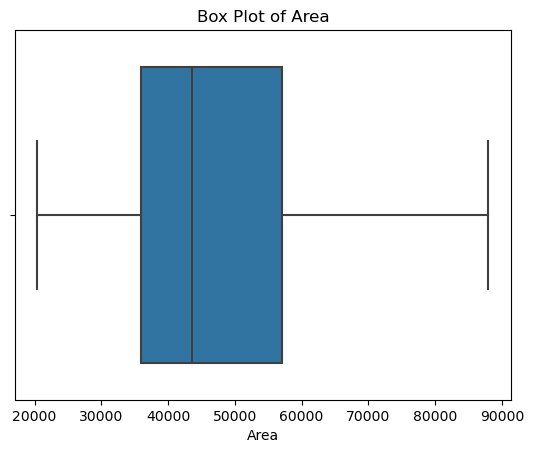

In [191]:
# Dealing with Outliers
sns.boxplot(data=data, x='Area')
plt.title('Box Plot of Area')
plt.xlabel('Area')
plt.show()

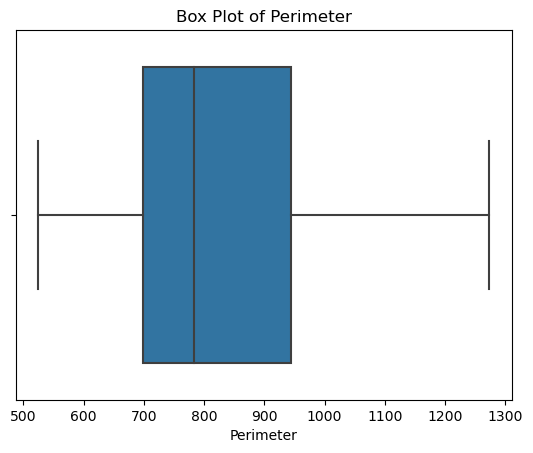

In [192]:
# Dealing with Outliers
sns.boxplot(data=data, x='Perimeter')
plt.title('Box Plot of Perimeter')
plt.xlabel('Perimeter')
plt.show()

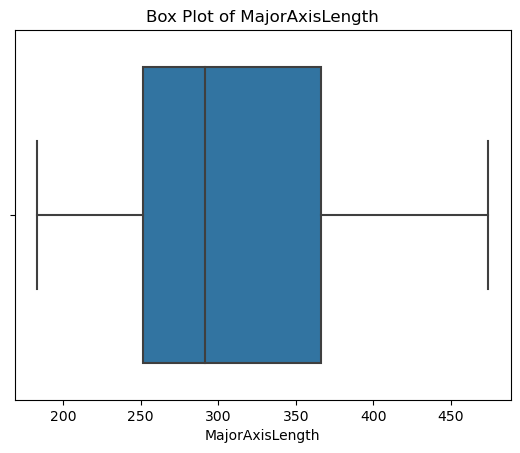

In [193]:
# Dealing with Outliers
sns.boxplot(data=data, x='MajorAxisLength')
plt.title('Box Plot of MajorAxisLength')
plt.xlabel('MajorAxisLength')
plt.show()

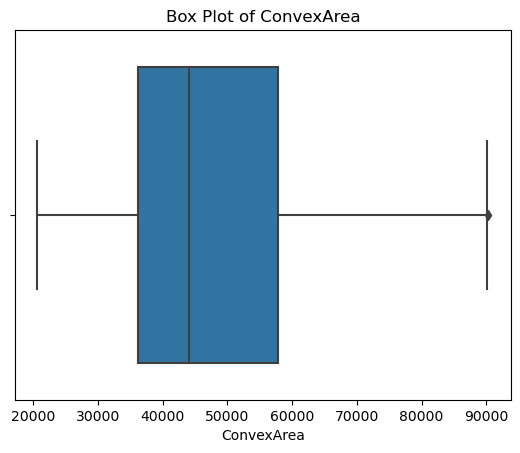

In [195]:
# Dealing with Outliers
sns.boxplot(data=data, x='ConvexArea')
plt.title('Box Plot of ConvexArea')
plt.xlabel('ConvexArea')
plt.show()

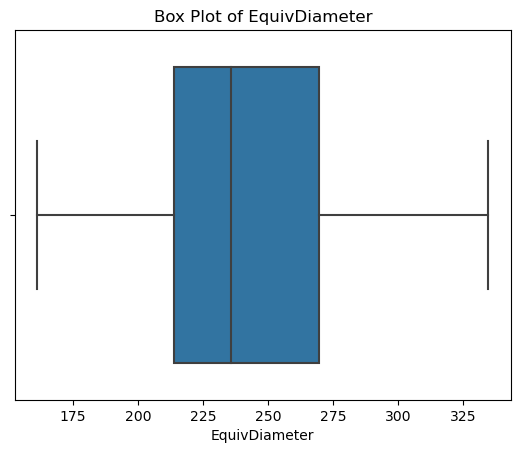

In [196]:
# Dealing with Outliers
sns.boxplot(data=data, x='EquivDiameter')
plt.title('Box Plot of EquivDiameter')
plt.xlabel('EquivDiameter')
plt.show()

In [197]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,12876.000000,12876.000000,12876.000000,11892.000000,12876.000000,12876.000000,12123.000000,12876.000000,12876.000000,12876.000000,12876.000000,11576.000000,12374.000000,12876.000000,12876.000000,11883.000000
mean,47493.707285,820.075367,306.899220,194.186912,1.581235,0.749225,48095.357667,242.788061,0.748545,0.987198,0.874406,0.800400,0.006719,0.001763,0.645108,0.995260
std,15500.027201,152.323370,64.474156,27.894308,0.251532,0.093765,15790.847423,39.050504,0.049230,0.004601,0.060378,0.062764,0.000937,0.000577,0.100807,0.004248
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.004241,0.000751,0.410339,0.947687
25%,35866.250000,698.967500,251.430115,174.570443,1.425808,0.712810,36236.500000,213.696813,0.717329,0.985777,0.831119,0.762328,0.006110,0.001224,0.581821,0.994028
50%,43634.000000,783.463000,291.306257,190.923723,1.546572,0.762837,44057.000000,235.704337,0.758568,0.988313,0.886059,0.802412,0.006697,0.001745,0.644279,0.996528
75%,57029.250000,943.759000,366.476990,209.000545,1.706619,0.810344,57828.500000,269.465946,0.785970,0.990006,0.918652,0.835838,0.007323,0.002202,0.698858,0.997953
max,87968.000000,1273.205000,473.950668,301.705356,2.430306,0.911423,90297.000000,334.670489,0.866195,0.994378,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## iii. Data Transformation

In [35]:
X = data.drop('Class',axis=1)
y = data[['Class']]

In [36]:
X.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

In [37]:
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.799551,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [38]:
y.head()

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X[:10]


array([[-1.23222035, -1.37728383, -1.53123272, -0.77782982, -1.52687873,
        -2.12680046, -1.28164682, -1.34822866,  0.31236768,  0.36030015,
         1.38500853,  1.89959905,  0.6726535 ,  2.39778005,  1.87608399,
         0.85243787],
       [-1.21034857, -1.19524954, -1.64994103, -0.44890347, -1.92380179,
        -3.59890195, -1.25192982, -1.31924831,  0.71956984, -0.48097914,
         0.20914948, -0.01282315,  0.28866067,  3.11876301,  2.62634283,
         0.78050995],
       [-1.16866961, -1.28655884, -1.45913881, -0.70188333, -1.47709691,
        -1.98905647, -1.21824622, -1.26449264,  0.600635  ,  0.51305723,
         1.21643694,  1.82257689,  0.57732721,  2.22537508,  1.79323134,
         0.93629609],
       [-1.12815198, -1.14360739, -1.49431909, -0.45700622, -1.70003785,
        -2.67282445, -1.15100908, -1.21183678,  0.69342885, -2.28288456,
         0.48910807,  2.15117553,  0.33009065,  2.5142792 ,  2.14960878,
        -0.25629448],
       [-1.11963553, -1.31266221, -1

In [40]:
X.var()

1.0000000000000002

In [41]:
y.Class.unique()

array(['SEKER', 'BARBUNYA', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [42]:
y.Class = y.Class.map({'SEKER': 0, 'BARBUNYA': 1, 'CALI': 2, 'HOROZ': 3, 'SIRA': 4, 'DERMASON': 5})
y.head(10)


,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [43]:
y = y[['Class']].values
y[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [44]:
X.shape, y.shape

((12876, 16), (12876, 1))

## 4. Split the data into training and testing sets.


In [45]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,random_state=42,test_size= 0.2 , stratify=y)

In [46]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((10300, 16), (2576, 16), (10300, 1), (2576, 1))

## 5. Model Building 

### i. Bagging Model (Random Forest)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators = 100

# Fit the model on the training data
rf.fit(xtrain,ytrain)

# Make predictions on the test data
predictions = rf.predict(xtest)

# Evaluate the model's performance (F1-score)
f1_score = f1_score(ytest,predictions,average='weighted')

print('Random Forest F1 Score: ', f1_score)

Random Forest F1 Score:  0.9099200744586651


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=10, random_state=42) # n_estimators=10

# Fit the model on the training data
rf.fit(xtrain,ytrain)

# Make predictions on the test data
predictions = rf.predict(xtest)

# Evaluate the model's performance (F1-score)
f1_score = f1_score(ytest,predictions,average='weighted')

print('Random Forest F1 Score: ', f1_score)

Random Forest F1 Score:  0.9037852911686116


### ii. Bagging Model (Gradient Boosting )

In [272]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Create a GradientBoostingClassifier classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42) # n_estimators = 100

# Fit the model on the training data
gb.fit(xtrain,ytrain)

# Make predictions on the test data
predictions = gb.predict(xtest)

# Evaluate the model's performance (F1-score)
f1_score = f1_score(ytest,predictions,average='weighted')

print('GradientBoosting F1 Score: ', f1_score)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoosting F1 Score:  0.9114090849868334


In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Create a GradientBoostingClassifier classifier
gb = GradientBoostingClassifier(n_estimators=10, random_state=42) # n_estimators = 10

# Fit the model on the training data
gb.fit(xtrain,ytrain)

# Make predictions on the test data
predictions = gb.predict(xtest)

# Evaluate the model's performance (F1-score)
f1_score = f1_score(ytest,predictions,average='weighted')

print('GradientBoosting F1 Score: ', f1_score)

GradientBoosting F1 Score:  0.8962701155623878


## 6. Stacking

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
def model_predictions(model, train_x, train_y, test_x):
    
    #train the model
    model.fit(train_x,train_y)
    
    #storing predictions for train and test
    pred_train=model.predict(train_x)
    pred_test=model.predict(test_x)
    return pred_train, pred_test

In [52]:
#Model 1 - Random Forest
rf = RandomForestClassifier(n_estimators = 10, random_state=42)
M1train, M1test = model_predictions(rf, xtrain,ytrain,xtest)

In [53]:
M1train,M1test

(array([3, 4, 4, ..., 4, 2, 0], dtype=int64),
 array([3, 5, 4, ..., 1, 3, 1], dtype=int64))

In [54]:
#Model 2 - Gradient Boost
gb = GradientBoostingClassifier(n_estimators=10, random_state=42)
M2train, M2test = model_predictions(gb, xtrain,ytrain, xtest)

In [55]:
M2train, M2test

(array([3, 4, 5, ..., 5, 2, 5], dtype=int64),
 array([3, 5, 4, ..., 1, 3, 1], dtype=int64))

In [56]:
#Model 3 - Logistic Regression
lr = LogisticRegression(random_state=101)
M3train, M3test = model_predictions(lr, xtrain, ytrain, xtest)

In [57]:
M3train, M3test

(array([3, 4, 0, ..., 5, 2, 5], dtype=int64),
 array([3, 5, 4, ..., 1, 3, 1], dtype=int64))

In [60]:
#Creating a New train dataframe
train_predictions = {
              'RF': M1train,
              'GB': M2train,
              'LR': M3train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,RF,GB,LR
0,3,3,3
1,4,4,4
2,4,5,0
3,4,0,0
4,3,3,3


In [61]:
#Creating a New test dataframe
test_predictions = {
    'RF': M1test,
    'GB': M2test,
    'LR': M3test
}
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,RF,GB,LR
0,3,3,3
1,5,5,5
2,4,4,4
3,4,5,5
4,4,4,4


In [161]:
# Stacker Model
model = LogisticRegression()
model.fit(train_predictions,ytrain)
predict = model.predict(test_predictions)
score = model.score(test_predictions,ytest)
print('Stacker Model F1 Score: ', score)

Stacker Model F1 Score:  0.9041149068322981


## 7. Tune hyper-parameters of the models to improve performance.


### i. Hyperparameter Tuning for Random Forest (Bagging Model)

In [166]:
from sklearn.model_selection import RandomizedSearchCV

# Create a RandomForestClassifier 
rf = RandomForestClassifier(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators' : [6,7,8,9,10,11],
    'max_depth' : [4,5,6,7,8,9,10,11,12,13,15,17,20],
    'max_features': [0.3,0.5, 0.7,0.9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

# Create RandomizedSearchCV Object
randomsearch = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,n_iter=10,n_jobs=-1,cv=5)

In [167]:
# Fit the grid search to your training data
randomsearch.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 13, 15, 17, 20],
                                        'max_features': [0.3, 0.5, 0.7, 0.9],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [6, 7, 8, 9, 10, 11]})

In [168]:
# Get the best hyperparameters
randomsearch.best_params_

{'n_estimators': 7,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 0.7,
 'max_depth': 11}

In [172]:
# Train a Random Forest classifier with the best hyperparameters
rf = RandomForestClassifier(n_estimators=7,min_samples_split=10,min_samples_leaf=2, max_features=0.7,max_depth=11)
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=11, max_features=0.7, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=7)

In [173]:
# Make predictions and evaluate the model
rf.score(xtest,ytest)
print("Random Forest Best F1 Score:",rf.score(xtest,ytest))

Random Forest Best F1 Score: 0.90722049689441


In [174]:
# Make predictions and evaluate the model
from sklearn.metrics import f1_score

predict = rf.predict(xtest)
f1score1 = f1_score(ytest,predict,average='weighted')
print("Random Forest Best F1 Score:",f1score1)

Random Forest Best F1 Score: 0.907296511956835


### ii. Hyperparameter Tuning for Gradient Boosting (Boosting Model)

In [122]:
from sklearn.model_selection import RandomizedSearchCV

# Create a GradientBoostingClassifier 
gb = GradientBoostingClassifier(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators' : [6,7,8,9,10,11],
    'max_depth' : [4,5,6,7,8,9,10,11,12,13,15,17,20],
    'max_features': [0.3,0.5, 0.7,0.9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

# Create RandomizedSearchCV Object
randomsearch2 = RandomizedSearchCV(estimator=gb,param_distributions=param_grid,n_iter=10,n_jobs=-1,cv=5)

In [123]:
# Fit the grid search to your training data
randomsearch2.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 13, 15, 17, 20],
                                        'max_features': [0.3, 0.5, 0.7, 0.9],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [6, 7, 8, 9, 10, 11]})

In [124]:
# Get the best hyperparameters
randomsearch2.best_params_

{'n_estimators': 9,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 7}

In [129]:
# Train a GradientBoostingClassifier with the best hyperparameters
gb = GradientBoostingClassifier(n_estimators=9,min_samples_split=10,min_samples_leaf=1, max_features=0.5,max_depth=7)
gb.fit(xtrain,ytrain)

GradientBoostingClassifier(max_depth=7, max_features=0.5, min_samples_split=10,
                           n_estimators=9)

In [176]:
# Make predictions and evaluate the model
gb.score(xtest,ytest)
print("Gradient Boost Best F1 Score:",gb.score(xtest,ytest))

Gradient Boost Best F1 Score: 0.9083850931677019


In [177]:
# Make predictions and evaluate the model
from sklearn.metrics import f1_score

predict = gb.predict(xtest)
f1score = f1_score(ytest,predict,average='weighted')
print("Gradient Boost Best F1 Score:",f1score)

Gradient Boost Best F1 Score: 0.9085293932242035


## 8. Feature Importance

### i. Feature Importance for Random Forest

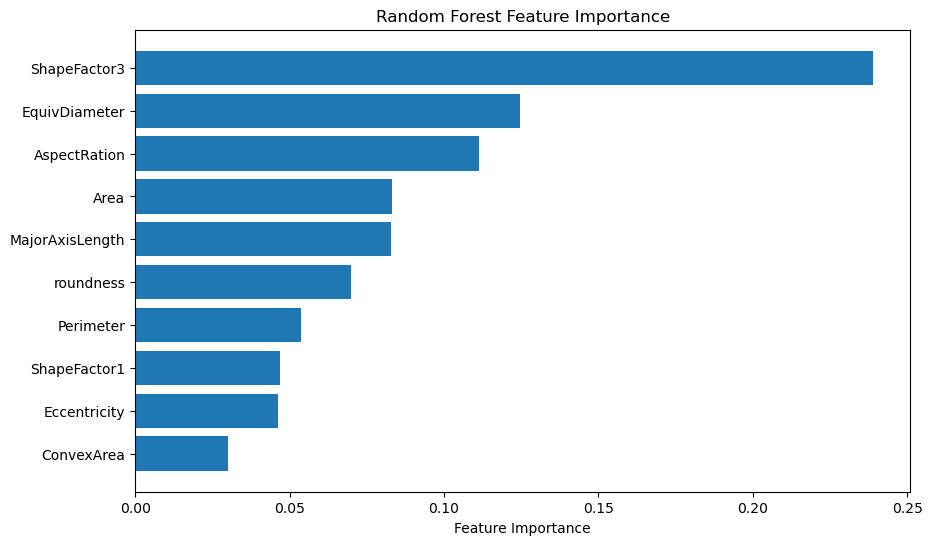

In [139]:
import matplotlib.pyplot as plt

x = data.drop('Class',axis=1)
# Get feature importances from the trained Random Forest model
feature_importances_rf = rf.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df_rf = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances_rf})

# Sort features by importance in descending order
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
top_n = 10  # You can change this to the number of top features you want to visualize
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance_df_rf['Importance'][:top_n])
plt.yticks(range(top_n), feature_importance_df_rf['Feature'][:top_n])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [147]:
feature_importance_df_rf

,Feature,Importance
14,ShapeFactor3,0.238986
7,EquivDiameter,0.124668
4,AspectRation,0.111205
0,Area,0.083195
2,MajorAxisLength,0.082778
10,roundness,0.069947
1,Perimeter,0.053722
12,ShapeFactor1,0.046793
5,Eccentricity,0.046343
6,ConvexArea,0.030148


### ii. Feature Importance for Gradient Boost

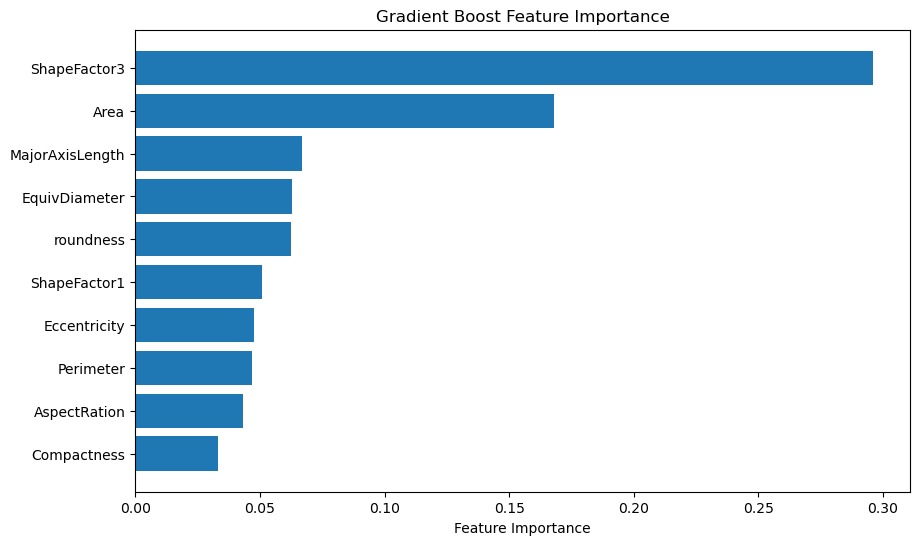

In [159]:
import matplotlib.pyplot as plt

x = data.drop('Class',axis=1)
# Get feature importances from the trained Gradient Boost model
feature_importances_gb = gb.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df_gb = pd.DataFrame({'Feature':x.columns,'Importance':feature_importances_gb})

# Sort features by importance in descending order
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance',ascending=False)

# Plot the top N most important features
top_n = 10  # You can change this to the number of top features you want to visualize
plt.figure(figsize=(10,6))
plt.barh(range(top_n),feature_importance_df_gb['Importance'][:top_n])
plt.yticks(range(top_n),feature_importance_df_gb['Feature'][:top_n])
plt.xlabel('Feature Importance')
plt.title('Gradient Boost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [152]:
feature_importance_df_gb

,Feature,Importance
14,ShapeFactor3,0.296087
0,Area,0.168059
2,MajorAxisLength,0.066747
7,EquivDiameter,0.063006
10,roundness,0.062603
12,ShapeFactor1,0.050683
5,Eccentricity,0.047759
1,Perimeter,0.046724
4,AspectRation,0.043434
11,Compactness,0.033132
